# Tugas Mandiri

## Data penjualan/data Motor bekas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [13]:
# Membaca dataset penjualan
df_motor = pd.read_csv('motor_second.csv')
print(df_motor.head())


          model  tahun  harga  transmisi  odometer   jenis  pajak  \
0   Supra X 125   2017   7999     Manual     17307   Bebek  145.0   
1     Vario 125   2016  14499  Automatic     25233  Skuter  235.0   
2     Vario 125   2016  11399  Automatic     37877  Skuter   30.0   
3          Revo   2016   6499     Manual     23789   Bebek   20.0   
4           PCX   2015  10199  Automatic     33177  Skuter  160.0   

   konsumsiBBM  mesin  
0         58.9  125.0  
1         43.5  125.0  
2         61.7  125.0  
3         60.1  110.0  
4         51.4  150.0  


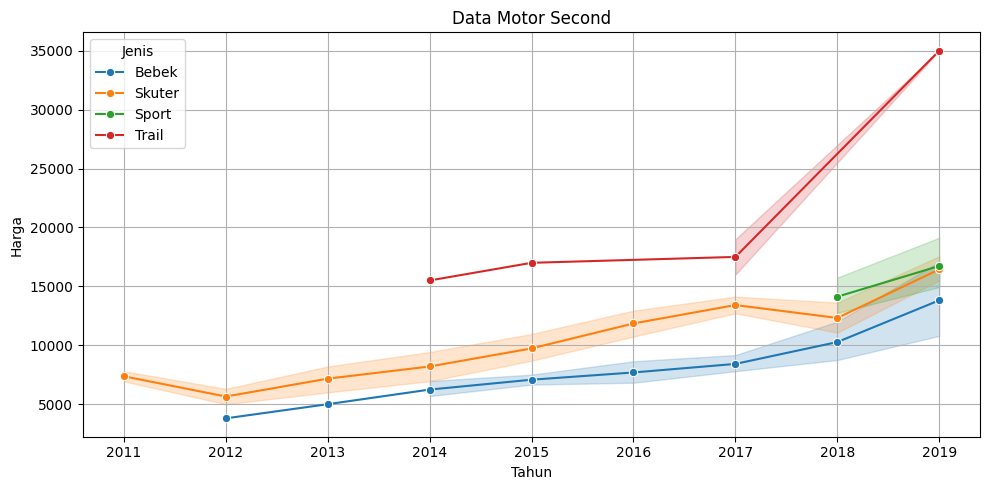

In [10]:
# Visualisasi 1: Line Chart - Data Motor Second
plt.figure(figsize=(10, 5))
sns.lineplot(x='tahun', y='harga', hue='jenis', marker='o',
data=df_motor)
plt.title('Data Motor Second')
plt.ylabel('Harga')
plt.xlabel('Tahun')
plt.grid(True)
plt.legend(title='Jenis')
plt.tight_layout()
plt.savefig('Motor_Second.png')
plt.show()

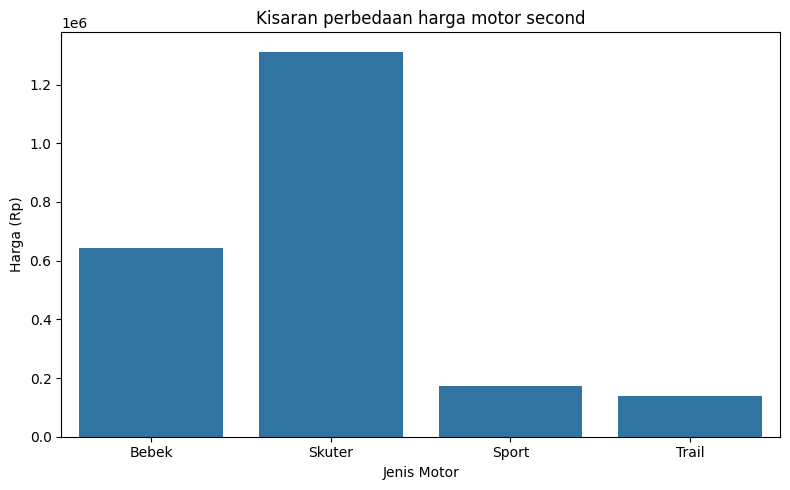

In [6]:
# Visualisasi 2: Bar Chart - Total Pendapatan Per Produk
total_pendapatan = df_motor.groupby('jenis')['harga'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='jenis', y='harga', data=total_pendapatan)
plt.title('Kisaran Perbedaan Harga Motor Second')
plt.ylabel('Harga (Rp)')
plt.xlabel('Jenis Motor')
plt.tight_layout()
plt.savefig('perbandingan_jenis_dan_harga.png')
plt.show()

## Data Ulasan Sentimen

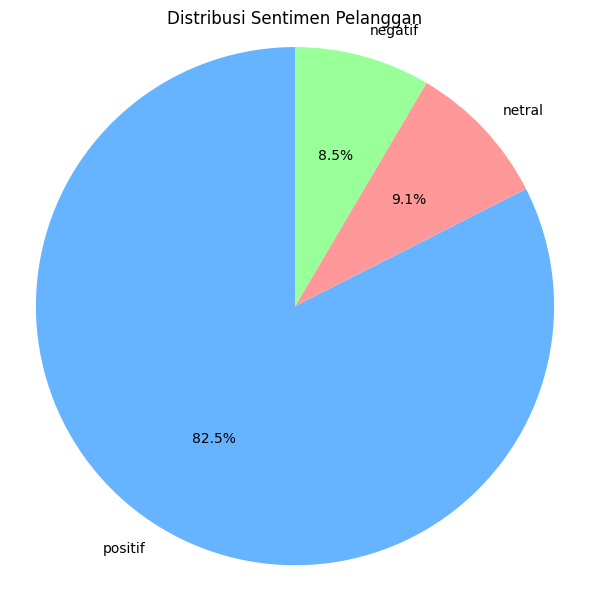

In [ ]:
# Membaca dataset laptop
df_laptop = pd.read_csv('laptops_dataset_final_600.csv')

# Fungsi analisis sentimen sederhana
def get_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positif'
    elif polarity < 0:
        return 'negatif'
    else:
        return 'netral'

# Terapkan fungsi ke kolom review (ganti 'review' jika nama kolom berbeda)
df_laptop['sentimen'] = df_laptop['review'].apply(get_sentiment)

# Visualisasi 3: Pie Chart - Distribusi Sentimen
sentimen_count = df_laptop['sentimen'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentimen_count, labels=sentimen_count.index, autopct='%1.1f%%',
startangle=90, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Distribusi Sentimen Pelanggan')
plt.axis('equal')
plt.tight_layout()
plt.savefig('distribusi_sentimen.png')
plt.show()

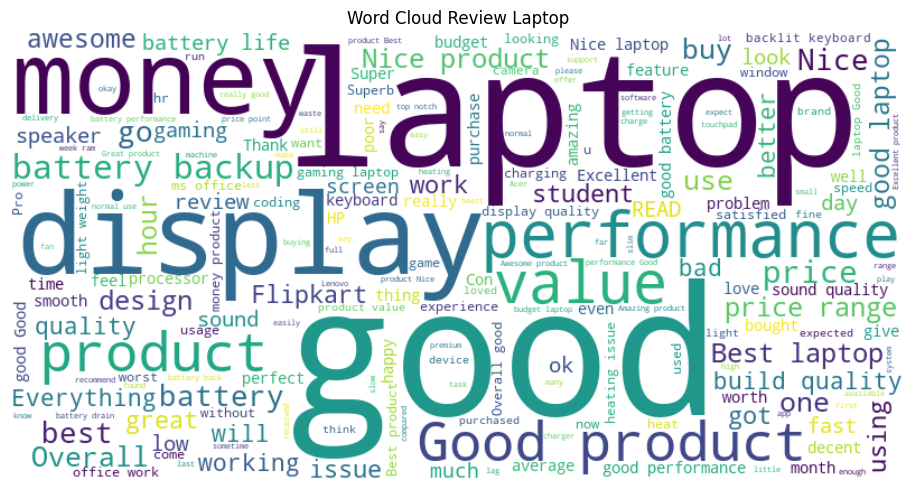

In [9]:
# Visualisasi 4: Word Cloud - Kata yang Sering Muncul dalam Review
all_text = " ".join(str(review) for review in df_laptop['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Review Laptop')
plt.tight_layout()
plt.savefig('word_cloud_review_laptop.png')
plt.show()